# Plotting quarterly SNAP recipients

NEOCANDO collects data on quartery SNAP benefits broken down by city and neighborhood dating back to 2010. Nationwide, the number of SNAP recipients increased during this time, although 2015 is the first year to reverse this trend in some time.

We can compare the rate of growth of SNAP users in the suburbs of Cleveland as compared with the neighborhoods in Cleveland itself to see how this program has affected Cuyahoga county. Our methodology removes neighborhoods or cities with small populations (less than 3,000 people), and then plots the number of SNAP users per 1,000 people, normalized (divided by the value of each geography at Q1 of 2010). This displays the percent difference between any given time and the first time period, to measure growth from that point. 

Assuming populations equal the Census estimates in 2010 and ignoring population shifts, as that data is not available for the time periods and geographies, we estimate that the number of SNAP recipients in the Cleveland suburbs has increased 28.0 percent over this time period, compared to 13.4 for the city of Cleveland. The plots include a variety of neighborhoods and allow us to see that neighborhoods like Ohio City, Tremont, and Detroit Shoreway have either decreased or remained flat over this time period, while others, such as Glenville and Kamm's, have increased.

Also included is a percent change over time chart, dividing the difference between two time periods by the first in order to see how the percent changes from one time period to the next. Most of the increase in recipients for both regions occurs in mid-2010, with another noticeable uptick in 2013.

In [656]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtk
%matplotlib inline

In [519]:
df1 = pd.read_csv('2010-2011-by-neigh.csv')
df2 = pd.read_csv('2012-2013-by-neigh.csv')
df3 = pd.read_csv('2014-by-neigh.csv')
pop = pd.read_csv('2010-population.csv')

In [520]:
pop.index = pop.Neighborhood
pop = pop.iloc[:,2]

In [380]:
pop.loc[pop.iloc[:,2]<3000,'Neighborhood']

5               Bentleyville
7                  Bratenahl
14          Brooklyn Heights
18    Chagrin Falls Township
24          Cuyahoga Heights
25           Cuyahoga Valley
35               Gates Mills
37                Glenwillow
40            Highland Hills
41                   Hopkins
43            Hunting Valley
51                  Linndale
59          Newburgh Heights
61             North Randall
86               Valley View
87              Walton Hills
91                  Woodmere
Name: Neighborhood, dtype: object

In [376]:
neighborhoods = pop.loc[pop.iloc[:,2]>3000,'Neighborhood']

neighs = [u'Bellaire-Puritas', u'Bratenahl', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Brooklyn Heights', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Cuyahoga Valley', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Fairview Park', u'Glenville', u'Glenwillow', u'Goodrich-Kirtland Pk', u'Hopkins', u'Hough', u'Jefferson', u"Kamm's", u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Linndale', u'Moreland Hills', u'Mount Pleasant', u'Newburgh Heights', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University']
neighs2 = [u'Bellaire-Puritas', u'Bratenahl', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Brooklyn Heights', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Fairview Park', u'Glenville', u'Glenwillow', u'Goodrich-Kirtland Pk', u'Hough', u'Jefferson', u"Kamm's", u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Linndale', u'Moreland Hills', u'Mount Pleasant', u'Newburgh Heights', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University']
junk = ['Hopkins','Cuyahoga Valley']

In [395]:
df = pd.concat([df1.iloc[:,:-1], df2.iloc[:,2:-1], df3.iloc[:,2:-1]], axis=1)
df.index = df.Neighborhood
df = df.iloc[:,2:]

rng = pd.date_range('1/1/2010', periods=20, freq='3M')
df.columns = rng
df = df.transpose()

In [449]:
neighs = [u'Bellaire-Puritas', u'Bratenahl', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Brooklyn Heights', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Cuyahoga Valley', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Fairview Park', u'Glenville', u'Glenwillow', u'Goodrich-Kirtland Pk', u'Hopkins', u'Hough', u'Jefferson', u"Kamm's", u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Linndale', u'Moreland Hills', u'Mount Pleasant', u'Newburgh Heights', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University', u'West Boulevard']
neighs2 = [u'Bellaire-Puritas', u'Bratenahl', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Brooklyn Heights', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Fairview Park', u'Glenville', u'Glenwillow', u'Goodrich-Kirtland Pk', u'Hough', u'Jefferson', u"Kamm's", u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Linndale', u'Moreland Hills', u'Mount Pleasant', u'Newburgh Heights', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University', u'West Boulevard']
junk = ['Hopkins','Cuyahoga Valley']

In [450]:
df_pop = df.loc[:,df.columns.isin(neighborhoods)]
burbs = df.loc[:,(~df.columns.isin(neighs2)) & (df.columns.isin(neighborhoods))]
cle = df.loc[:,df.columns.isin(neighs) & df.columns.isin(neighborhoods)]

In [452]:
cle.columns

Index([u'Bellaire-Puritas', u'Broadway-Slavic Village', u'Brooklyn Centre', u'Buckeye-Shaker Square', u'Buckeye-Woodhill', u'Central', u'Clark-Fulton', u'Collinwood-Nottingham', u'Cudell', u'Detroit Shoreway', u'Downtown', u'East Cleveland', u'Edgewater', u'Euclid-Green', u'Fairfax', u'Fairview Park', u'Glenville', u'Goodrich-Kirtland Pk', u'Hough', u'Jefferson', u'Kamm's', u'Kinsman', u'Lee-Harvard', u'Lee-Seville', u'Moreland Hills', u'Mount Pleasant', u'North Shore Collinwood', u'Ohio City', u'Old Brooklyn', u'St.Clair-Superior', u'Stockyards', u'Tremont', u'Union-Miles', u'University', u'West Boulevard'], dtype='object')

In [453]:
print burbs.shape, cle.shape

(20, 40) (20, 35)


In [454]:
def per_change(x):
    changes = []
    for ind, val in enumerate(x):
        if ind < len(x):
            if x[0] == 0:
                changes.append(x[ind]/1)
            else:
                changes.append(x[ind]/x[0])
    return changes

In [592]:
norm = df_pop.apply(per_change, axis=0)
cle_norm = cle.apply(per_change, axis=0)
burbs_norm = burbs.apply(per_change, axis=0)

In [563]:
print sum(pop[pop.index.isin(burbs.columns)])
burbs_pop = pop[pop.index.isin(burbs.columns)]

827472.0


In [564]:
cle_pop = pop[pop.index.isin(cle.columns)]
round(sum(cle_pop))

433552.0

In [545]:
burbs_tot = burbs.iloc[:,burbs.columns.isin(pop.index)]*pop[pop.index.isin(burbs.columns)]/1000
burbs_tot = burbs_tot.apply(sum, axis=1)

In [546]:
cle_tot = cle.iloc[:,cle.columns.isin(pop.index)]*pop[pop.index.isin(cle.columns)]/1000
cle_tot = cle_tot.apply(sum, axis=1)

In [549]:
burbs_tot/burbs_tot[0]

2010-01-31    1.000000
2010-04-30    1.039389
2010-07-31    0.984869
2010-10-31    1.129848
2011-01-31    1.193516
2011-04-30    1.209995
2011-07-31    1.210975
2011-10-31    1.232740
2012-01-31    1.263656
2012-04-30    1.268757
2012-07-31    1.266361
2012-10-31    1.278486
2013-01-31    1.237257
2013-04-30    1.305842
2013-07-31    1.301705
2013-10-31    1.301652
2014-01-31    1.294897
2014-04-30    1.274543
2014-07-31    1.275660
2014-10-31    1.279763
Freq: 3M, dtype: float64

In [550]:
cle_tot/cle_tot[0]

2010-01-31    1.000000
2010-04-30    0.987084
2010-07-31    0.928473
2010-10-31    1.029575
2011-01-31    1.081483
2011-04-30    1.084884
2011-07-31    1.084169
2011-10-31    1.091972
2012-01-31    1.128373
2012-04-30    1.150599
2012-07-31    1.113631
2012-10-31    1.117751
2013-01-31    1.113841
2013-04-30    1.153223
2013-07-31    1.149323
2013-10-31    1.147039
2014-01-31    1.161302
2014-04-30    1.132150
2014-07-31    1.135445
2014-10-31    1.134493
Freq: 3M, dtype: float64

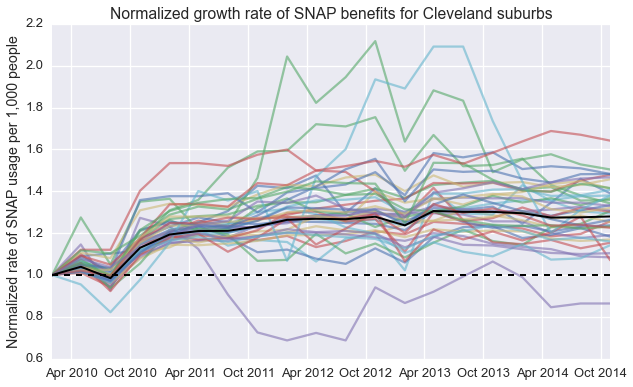

In [558]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
for i in burbs_norm.columns:
    plt.plot(rng,burbs_norm[i],alpha=0.6);

plt.plot(rng, 20*[1],'k--', linewidth=2);
plt.plot(rng, burbs_tot/burbs_tot[0],'k-',linewidth=2);
plt.title('Normalized growth rate of SNAP benefits for Cleveland suburbs');
plt.ylabel('Normalized rate of SNAP usage per 1,000 people');

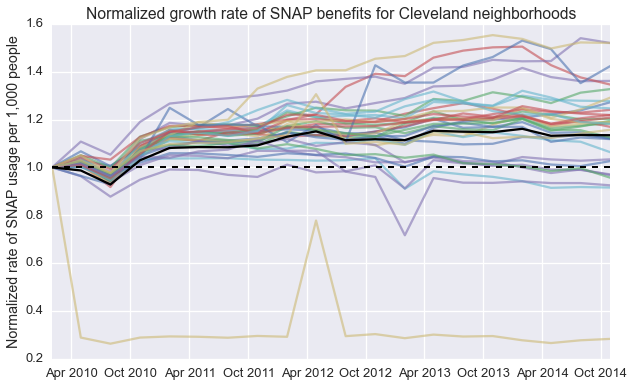

In [559]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10,6))
for i in cle_norm.columns:
    plt.plot(rng,cle_norm[i], alpha=0.6);
plt.plot(rng, 20*[1],'k--', linewidth=2);
plt.plot(rng,cle_tot/cle_tot[0], 'k-')
plt.title('Normalized growth rate of SNAP benefits for Cleveland neighborhoods');
plt.ylabel('Normalized rate of SNAP usage per 1,000 people');

In [651]:
def per_change2(x):
    changes = []
    for ind, val in enumerate(x):
        if ind < len(x)-1:
            if x[0] == 0:
                changes.append(x[ind]/1)
            else:
                changes.append((x[ind+1]-x[ind])/x[ind])
    return [x*100 for x in changes]

In [652]:
df_change = df_pop.apply(per_change2, axis=0)
cle_per = cle.apply(per_change2, axis=0)
burbs_per = burbs.apply(per_change2, axis=0)

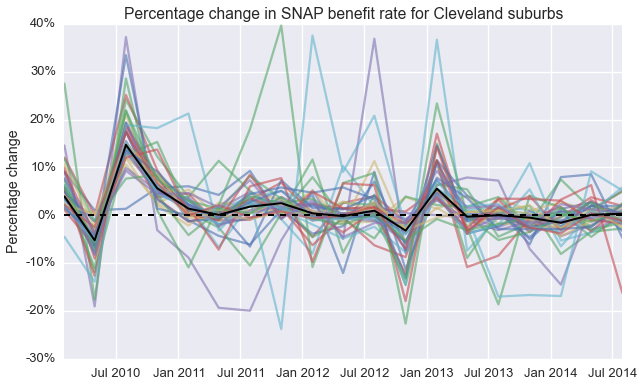

In [661]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in burbs_per:
    plt.plot(rng[:-1],i,alpha=0.6);

plt.plot(rng[:-1], 19*[0],'k--', linewidth=2);
plt.plot(rng[:-1], per_change2(burbs_tot),'k-',linewidth=2);
plt.title('Percentage change in SNAP benefit rate for Cleveland suburbs');
plt.ylabel('Percentage change');
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

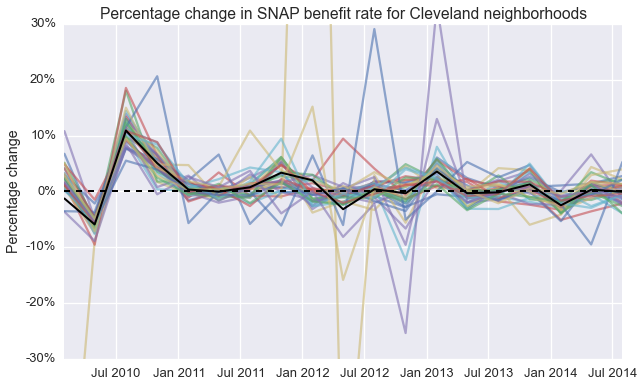

In [663]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in cle_per:
    plt.plot(rng[:-1],i,alpha=0.6);

plt.plot(rng[:-1], 19*[0],'k--', linewidth=2);
plt.plot(rng[:-1], per_change2(cle_tot),'k-',linewidth=2);
plt.title('Percentage change in SNAP benefit rate for Cleveland neighborhoods');
plt.ylabel('Percentage change');
plt.ylim(-30,30);
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

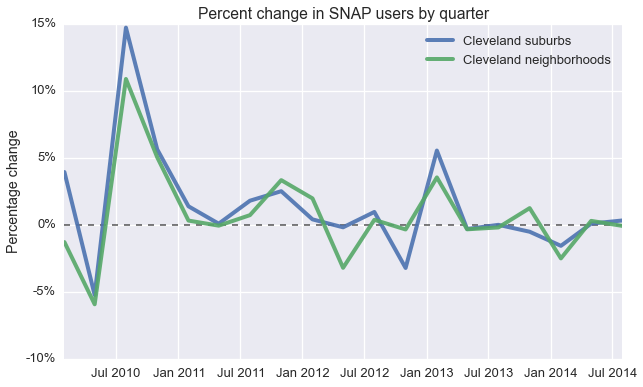

In [664]:
sns.set_context('talk')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

plt.plot(rng[:-1], 19*[0],'k--', linewidth=2, alpha=0.5);
plt.plot(rng[:-1], per_change2(burbs_tot),'-',linewidth=4, label="Cleveland suburbs",alpha=0.9);
plt.plot(rng[:-1], per_change2(cle_tot),'-',linewidth=4, label="Cleveland neighborhoods",alpha=0.9);
plt.legend();
plt.title('Percent change in SNAP users by quarter');
plt.ylabel('Percentage change');

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtk.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)